# Dependencias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

import re
sns.set_theme()
import sys
import os
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import utileria as ut
from Graficos import graficos
from limpieza import limpieza_regex
from grafos import grafos

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Planos factoriales

In [2]:
terms = [
    'bueno',       
    'bien',        
    'aceptable',   
    'adecuado',    
    'virtuoso',    
    'justo',       
    'está bien',   
    'genial',      
    'increíble',   
    'excepcional', 
    'significativo', 
    'mejor',       
    'ok',           
    'bien',         
    'malo',         
    'horrible',     
    'peor',         
    'terrible',     
    'horrible',
]


In [3]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,terms,2)

print(modelos.varianza_explicada())
print(modelos.componentes())

[20.465796  9.859646]
[[ 3.7494931  -2.2132754 ]
 [ 6.220348   -3.425356  ]
 [ 1.9704565   1.9698099 ]
 [ 1.7685646   3.1530237 ]
 [ 0.01687811  2.1217322 ]
 [ 3.6733444  -0.49092215]
 [ 5.250033   -1.9660481 ]
 [ 0.47052205  2.7727802 ]
 [-1.5312445   0.19315569]
 [-1.9418494   8.387539  ]
 [ 1.5908614   4.956796  ]
 [ 1.2118536  -0.18922888]
 [ 3.0275502  -1.3942916 ]
 [ 6.220348   -3.4253547 ]
 [-4.2652016  -2.1137738 ]
 [-7.3266983  -1.9544479 ]
 [-5.3472295  -2.481219  ]
 [-7.4313354  -1.946475  ]
 [-7.3266983  -1.9544479 ]]


In [4]:
cluster = modelos.k_means(3)
cluster.labels_

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1])

In [5]:
cluster.cluster_centers_[0]

array([0.44450536, 2.920701  ], dtype=float32)

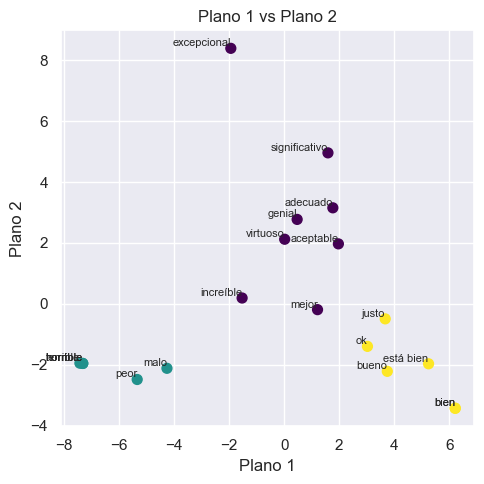

In [6]:
graficos.plot_column_combinations(modelos.componentes(), cluster.labels_,terms)

In [7]:
with open('../input/palabras_vacias.txt', 'r') as file:
    stop_words = file.read().splitlines()

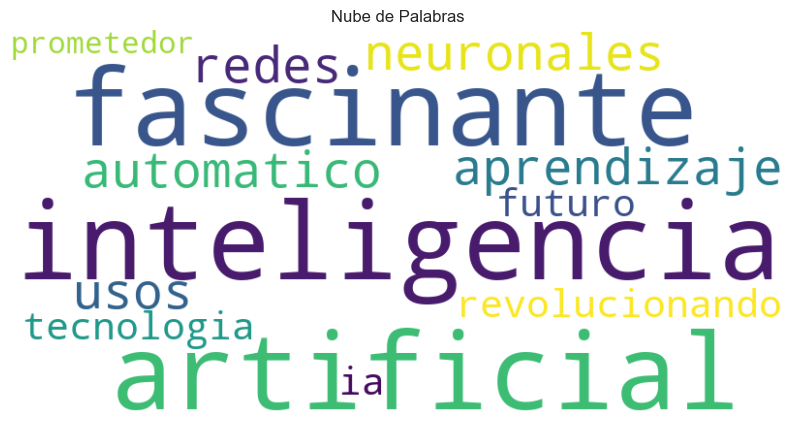

In [8]:
sentencias = [
    "La inteligencia artificial es fascinante.",
    "El aprendizaje automático tiene muchos usos.",
    "Las redes neuronales están revolucionando la tecnología.",
    "El futuro de la IA es prometedor."
]
sentencias = limpieza_regex.limpieza_de_textos(sentencias=sentencias)
sentencias = limpieza_regex.stop_words(stop_words,sentencias)
graficos.generar_wordcloud(sentencias)


# analisis de sentimientos 

In [11]:
sent,pola = ut.analisis_sentimientos(terms)
print(sent)
print(pola)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, -1, -1, 0, -1, -1]
[0.0, 0.7, 0.0, 0.5, 0.0, 0.7, 0.0, 0.9, 0.9, 0.6666666666666666, 0.375, 0.5, 0.5, 0.7, -0.6999999999999998, -1.0, -0.4, -1.0, -1.0]


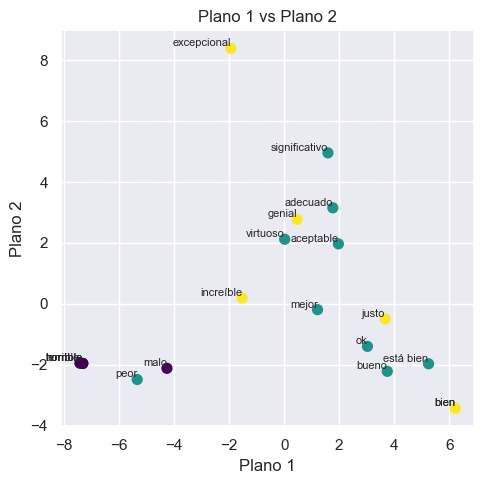

In [12]:
graficos.plot_column_combinations(modelos.componentes(), sent,terms)

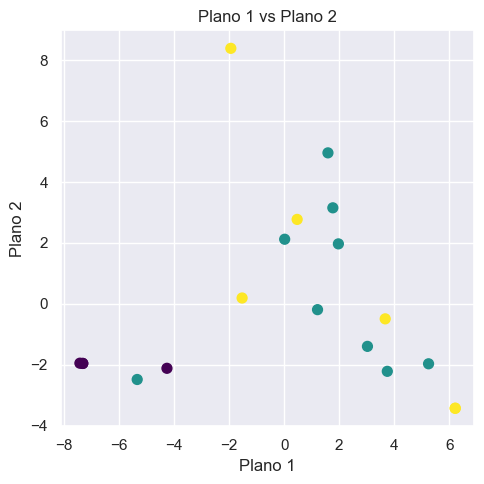

In [14]:
graficos.plot_column_combinations(modelos.componentes(),colors=sent)

# analisis de redes

In [15]:
from grafos import grafos

In [16]:
texto = ["""En los últimos 10 años, los depósitos de varios batallones del Ejército Nacional han venido siendo saqueados para vender armas y municiones en un mercado ilegal que va a parar a manos de grupos delincuenciales. Esa es la hipótesis que tiene la Fiscalía en contra de 50 miembros de una organización criminal compuesta hasta por militares activos y de la reserva que sacaron provecho de su poder en la institución para supuestamente traficar armamento.
(Puede ver: Fiscalía condecoró a investigadoras a cargo de desmantelar escándalo de corrupción en la UNGRD)
Los robos -que según el ente acusador puede ser tan rentable como el narcotráfico- se han producido desde el nivel central en Bogotá hasta regiones como la costa Caribe, Antioquia, Meta y Caquetá. Incluso, uno de los depósitos desde los que al parecer se han extraído armas queda a tres cuadras del búnker principal de la Fiscalía General: el batallón de Puente Aranda. 
El caso generó revuelo en el Gobierno. La semana pasada el ministro de Defensa, Iván Velásquez, rechazó contundentemente que grupos ilegales estén utilizando armas del Estado para atentar contra las tropas. “Resulta inadmisible, como tuvimos oportunidad de conocerlo recientemente, que integrantes de las Fuerzas Militares estén en tráfico de municiones, entregándole al enemigo las armas con las que matan a sus propios compañeros”, dijo el Ministro, anunciado que tomarán medidas estrictas para dar con los culpables.
(Le dejamos: Demanda que podría sacar del cargo al canciller Luis Gilberto Murillo llegó a Consejo de Estado)"""]
texto = limpieza_regex.limpieza_de_textos(sentencias=texto)
texto = limpieza_regex.stop_words(stop_words,texto)

texto
bigramas = grafos.Generacion_de_skipgramas(texto[0],2,1)


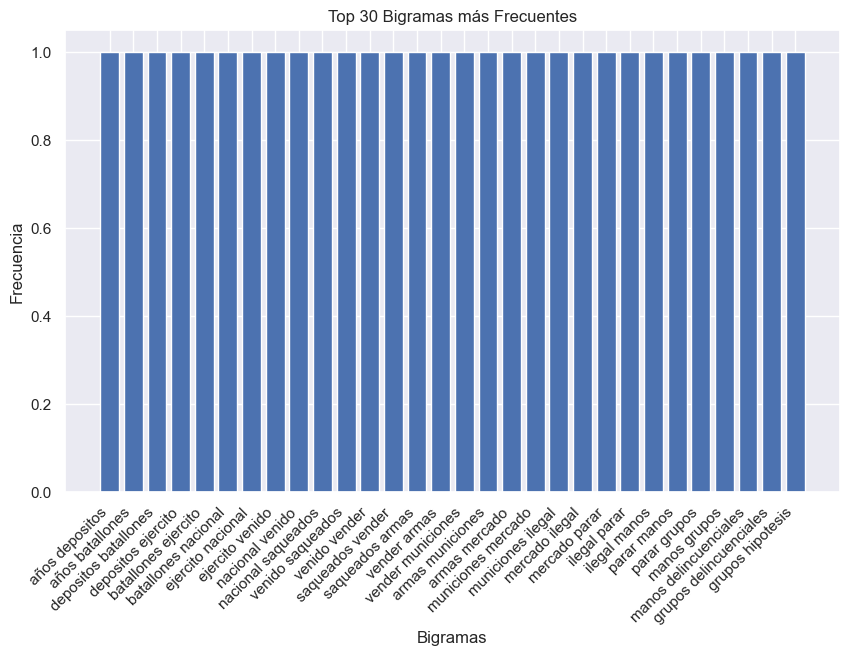

<module 'matplotlib.pyplot' from 'c:\\Users\\bcriv\\miniconda3\\envs\\dydde\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
grafos.plot_bigramas(bigramas,30)

In [18]:
bigramas = grafos.bigramas_para_grafo(bigramas,0)
g =  grafos.creacion_del_grafo(bigramas)

In [19]:
gigante = grafos.cluster_seleccion_componenteconexa_gigante(g,'../output/grafo_cph_texto_total_cluster.png','../output/grafo_cph_texto_total_cluster_comunidades.png')


Comunidad 0: Palabra más importante (según grado): depositos
Comunidad 1: Palabra más importante (según grado): armas
Comunidad 2: Palabra más importante (según grado): fiscalia
Comunidad 3: Palabra más importante (según grado): militares
Comunidad 4: Palabra más importante (según grado): cargo
Comunidad 5: Palabra más importante (según grado): desmantelar
Comunidad 6: Palabra más importante (según grado): nivel
Comunidad 7: Palabra más importante (según grado): ministro
Comunidad 8: Palabra más importante (según grado): atentar
Comunidad 9: Palabra más importante (según grado): matan


In [20]:
grafos.estadisticas_descriptivas(gigante)

{'diametro': 11,
 'nodo_mayor_grado': ['armas'],
 'grado_mayor': 16,
 'nodo_mayor_fuerza': 'armas',
 'fuerza_mayor': 16.0,
 'nodo_centralidad_closeness': 'armas',
 'nodo_centralidad_betweenness': 'armas',
 'nodo_centralidad_eigen': 'armas',
 'grado_promedio': 4.380952380952381,
 'clan_mas_grande': 4,
 'densidad': 0.04212454212454213}